In [100]:
from datasets import load_dataset
import Preprocessor as p

In [101]:
# Load the copenlu/answerable_tydiqa dataset
dataset = load_dataset("copenlu/answerable_tydiqa")

train_df = dataset['train'].to_pandas()
train_df = train_df[train_df['language'].isin(['indonesian', 'arabic', 'bengali'])]
train_df = p.DataFramePreprocessor(train_df).df

val_df = dataset['validation'].to_pandas()
val_df = val_df[val_df['language'].isin(['indonesian', 'arabic', 'bengali'])]
val_df = p.DataFramePreprocessor(val_df).df

<Figure size 1080x576 with 0 Axes>

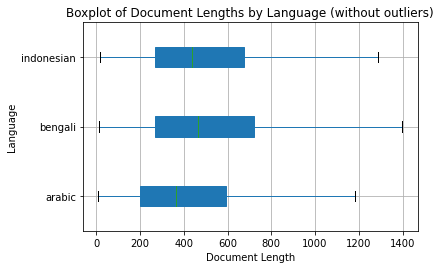

In [18]:
from matplotlib import pyplot as plt

data = train_df

data['document_length'] = data['document_plaintext'].str.len()

# Remove outliers (singular data points) by using the showfliers=False parameter in the boxplot function
plt.figure(figsize=(15, 8))
boxplot = data.boxplot(column='document_length', by='language', grid=True, patch_artist=True, vert=False, showfliers=False)

# Set the title and labels
plt.title('Boxplot of Document Lengths by Language (without outliers)')
plt.suptitle('')  # Suppress the default title
plt.ylabel('Language')
plt.xlabel('Document Length')
plt.tight_layout()

plt.show()

<Figure size 720x432 with 0 Axes>

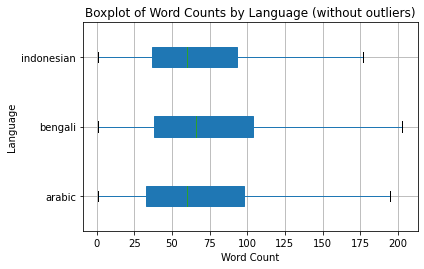

In [20]:
# Compute the number of words in 'document_plaintext' for each row
data['word_count'] = data['document_plaintext'].str.split().str.len()

# Boxplot of word counts by language
plt.figure(figsize=(10, 6))
boxplot = data.boxplot(column='word_count', by='language', grid=True, patch_artist=True, vert=False, showfliers=False)

# Set the title and labels
plt.title('Boxplot of Word Counts by Language (without outliers)')
plt.suptitle('')  # Suppress the default title
plt.ylabel('Language')
plt.xlabel('Word Count')
plt.tight_layout()

plt.show()


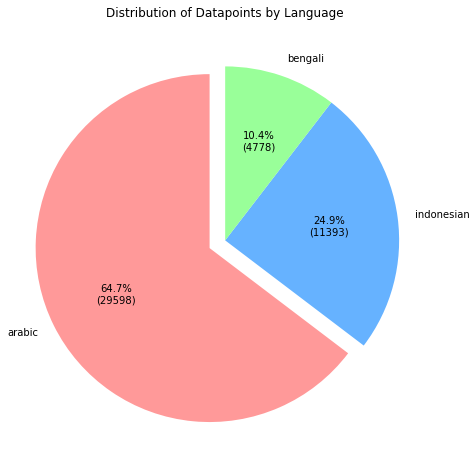

In [84]:
# Count the number of datapoints for each language
language_counts = data['language'].value_counts()

# Function to display both percentage and actual count
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return f"{pct:.1f}%\n({absolute:d})"

# Create a pie chart of the distribution of datapoints by language with specific count for each language
plt.figure(figsize=(8, 8))
language_counts.plot.pie(autopct=lambda pct: func(pct, language_counts), 
                         startangle=90, colors=['#FF9999', '#66B2FF', '#99FF99'], explode=(0.1, 0, 0))
plt.title('Distribution of Datapoints by Language')
plt.ylabel('')  # Remove the default ylabel

plt.show()



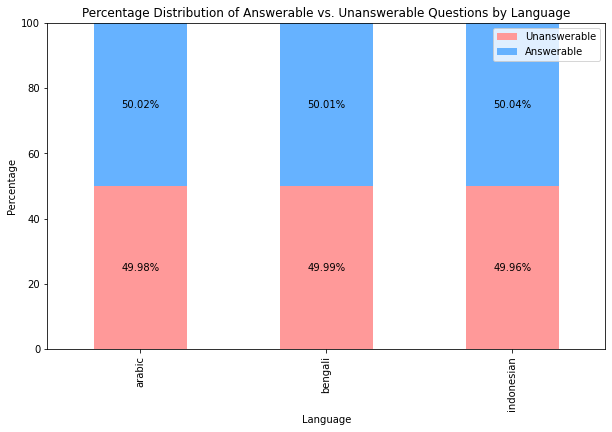

In [82]:

data['is_answerable'] = data['annotations'].apply(lambda x: x.get('answer_start', [-1])[0] != -1)

final_answerable_counts = data.groupby('language')['is_answerable'].value_counts().unstack().fillna(0)

final_answerable_percentage = (final_answerable_counts.T / final_answerable_counts.sum(axis=1)).T * 100

final_percentage_plot = final_answerable_percentage.plot.bar(stacked=True, figsize=(10, 6), color=['#FF9999', '#66B2FF'])
plt.title('Percentage Distribution of Answerable vs. Unanswerable Questions by Language')
plt.xlabel('Language')
plt.ylabel('Percentage')
plt.legend(['Unanswerable', 'Answerable'], loc='upper right')
plt.ylim(0, 100)  # Set y-axis limits to 0-100 for clarity

for p in final_percentage_plot.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 5:  # Only annotate if the height is large enough to be visible
        final_percentage_plot.annotate(f'{height:.2f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.show()



In [94]:
unique_question_percentage

language
arabic        50.020272
bengali       49.717514
indonesian    50.043883
dtype: float64

In [77]:
unique_question_counts

0.5002512507919862

In [79]:
(final_answerable_counts.T / final_answerable_counts.sum(axis=1)).T * 100

is_answerable,False,True
language,,
arabic,49.979728,50.020272
bengali,49.989538,50.010462
indonesian,49.956117,50.043883


In [65]:
data['annotations']


3         {'answer_start': [414], 'answer_text': ['বোরজি...
6         {'answer_start': [88], 'answer_text': ['مسألة ...
7         {'answer_start': [45], 'answer_text': ['28 Agu...
8         {'answer_start': [171], 'answer_text': ['10 كم']}
11        {'answer_start': [38], 'answer_text': ['Yoo Ke...
                                ...                        
116058          {'answer_start': [-1], 'answer_text': ['']}
116061          {'answer_start': [-1], 'answer_text': ['']}
116062          {'answer_start': [-1], 'answer_text': ['']}
116063          {'answer_start': [-1], 'answer_text': ['']}
116064          {'answer_start': [-1], 'answer_text': ['']}
Name: annotations, Length: 45771, dtype: object

In [85]:
data

,question_text,document_title,language,annotations,document_plaintext,document_url,is_answerable
3,চেঙ্গিস খান কোন বংশের রাজা ছিলেন ?,চেঙ্গিজ খান,bengali,"{'answer_start': [414], 'answer_text': ['বোরজি...",চেঙ্গিজ খান (মঙ্গোলীয়: Чингис Хаан আ-ধ্ব-ব: ...,https://bn.wikipedia.org/wiki/%E0%A6%9A%E0%A7%...,True
6,ما هي المسألة الشرقية ؟,المسألة الشرقية,arabic,"{'answer_start': [88], 'answer_text': ['مسألة ...",\n\nالمسألة الشرقية (بالإنجليزية: Eastern Ques...,https://ar.wikipedia.org/wiki/%D8%A7%D9%84%D9%...,True
7,dimanakah Dr. Ernest François Eugène Douwes D...,Ernest Douwes Dekker,indonesian,"{'answer_start': [45], 'answer_text': ['28 Agu...",Ernest Douwes Dekker wafat dini hari tanggal 2...,https://id.wikipedia.org/wiki/Ernest%20Douwes%...,True
8,كم تبعد بيت لحم على القدس؟,بيت لحم,arabic,"{'answer_start': [171], 'answer_text': ['10 كم']}",بيت لحم (بالسريانية: ܒܝܬ ܠܚܡ ؛ باليونانية: Βηθ...,https://ar.wikipedia.org/wiki/%D8%A8%D9%8A%D8%...,True
11,Siapa arsitek Balai Kota Seoul?,Balai Kota Seoul,indonesian,"{'answer_start': [38], 'answer_text': ['Yoo Ke...","Pada tanggal 18 Februari 2008, desain Yoo Kerl...",https://id.wikipedia.org/wiki/Balai%20Kota%20S...,True
...,...,...,...,...,...,...,...
116058,من هو ديفيد فنكلشتاين؟,ديفيد فنكلشتاين,arabic,"{'answer_start': [-1], 'answer_text': ['']}",تصنيف:أشخاص من مدينة نيويورك\nتصنيف:خريجو معهد...,https://ar.wikipedia.org/wiki/%D8%AF%D9%8A%D9%...,False
116061,من هو كريستيان دو دوف؟,كريستيان دو دوف,arabic,"{'answer_start': [-1], 'answer_text': ['']}",تصنيف:أعضاء أجانب في الجمعية الملكية\nتصنيف:أع...,https://ar.wikipedia.org/wiki/%D9%83%D8%B1%D9%...,False
116062,Kapan Kaisar Tang Gaozu mulai menjabat ?,Kaisar Tang Gaozu,indonesian,"{'answer_start': [-1], 'answer_text': ['']}","Hingga tahun 626, situasi makin memanas, Li Sh...",https://id.wikipedia.org/wiki/Kaisar%20Tang%20...,False
116063,من ابتكر المثلجات؟,مثلجات,arabic,"{'answer_start': [-1], 'answer_text': ['']}",وأشار هؤلاء الإخصائيون إلى أن “صداع الآيس كريم...,https://ar.wikipedia.org/wiki/%D9%85%D8%AB%D9%...,False


In [177]:
def oracle_eval(row):
    answer = row['annotations']['answer_text'][0]
    return bool(answer) and answer in row['document_plaintext']

def rule_based_classifier(row, threshold=0.5):
    ## count how many words in the question appear in the document
    question_words = row['question_text'].split()
    document_words = row['document_plaintext'].split()
    count = 0
    for word in question_words:
        if word in document_words:
            count += 1
    count = count / len(question_words)
    if count >= threshold:
        return True
    else:
        return False
            

In [179]:
## make a linear list from 0.05 to 0.95 with 0.05 increments
thresholds = [i/100 for i in range(5, 100)]

In [195]:
scores = []

for thresh in [i/100 for i in range(5, 100)]:
    count = 0
    for row in train_df.iterrows():
        if rule_based_classifier(row[1], thresh) == oracle_eval(row[1]):
            count += 1
    print("Score for threshold", thresh, "is", count/len(train_df))
    scores.append([thresh, count/len(val_df)])

Score for threshold 0.05 is 0.6698127635402329
Score for threshold 0.06 is 0.6699001551200542
Score for threshold 0.07 is 0.6699875466998755
Score for threshold 0.08 is 0.6705774398636691
Score for threshold 0.09 is 0.6713639640820607
Score for threshold 0.1 is 0.6726311419894693
Score for threshold 0.11 is 0.6747066920102248
Score for threshold 0.12 is 0.6787048567870486
Score for threshold 0.13 is 0.6847785715846278
Score for threshold 0.14 is 0.6848004194795831
Score for threshold 0.15 is 0.6940202311507286
Score for threshold 0.16 is 0.6943697974700138
Score for threshold 0.17 is 0.7077188612877149
Score for threshold 0.18 is 0.7077407091826703
Score for threshold 0.19 is 0.7080684276070001
Score for threshold 0.2 is 0.7080684276070001
Score for threshold 0.21 is 0.7196915077232309
Score for threshold 0.22 is 0.7196915077232309
Score for threshold 0.23 is 0.7204124882567564
Score for threshold 0.24 is 0.7206746629962203
Score for threshold 0.25 is 0.7206746629962203
Score for thres

In [176]:
count = 0
for row in val_df.iterrows():
    if rule_based_classifier(row[1], 0.25) == oracle_eval(row[1]):
        count += 1

Validation accuracy: 0.7286704853783539


TypeError: list indices must be integers or slices, not tuple